# DATA PREPARATION & MODEL TESTING

## Importing libraries

In [1]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf


from prepare_database import create_data , final_imgs , regroup_imgs

import warnings

warnings.filterwarnings("ignore")

## Filtering data and sampling

In [2]:
image_data = create_data('E:/fashion-dataset/styles.csv')
image_data.run()

*******************************************************************
info of the data
*******************************************************************


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44446 non-null  int64 
 1   articleType         44446 non-null  object
 2   productDisplayName  44439 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


*******************************************************************
It contains unique article types as given below
*******************************************************************


['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 

In [3]:
image_data.df.head()

,id,articleType,productDisplayName
0,15970,Shirts,Turtle Check Men Navy Blue Shirt
1,39386,Jeans,Peter England Men Party Blue Jeans
2,59263,Watches,Titan Women Silver Watch
3,21379,Track Pants,Manchester United Men Solid Black Track Pants
4,53759,Tshirts,Puma Men Grey T-shirt


In [4]:
image_data.final_data.head()

,id,articleType,productDisplayName,articleType_label
0,18427,Backpacks,Vital Gear Unisex Black Backpack,0
1,25868,Backpacks,American Tourister Unisex Purple Backpack,0
2,35203,Backpacks,Wildcraft Unisex Red & Black Backpack,0
3,39877,Backpacks,ADIDAS Unisex Navy Blue Checked Backpack,0
4,3474,Backpacks,ADIDAS Men Navy Cobalt Backpack,0


## Fetching necessary data only and saving in other directory

In [5]:
imgs_ = final_imgs(image_data.final_data , 'E:/fashion-dataset/filtered_data/' , 'E:/fashion-dataset/images'  )
imgs_.run()  

Process Completed.................


In [6]:
imgs_.df

,id,articleType,productDisplayName,articleType_label
0,18427.jpg,Backpacks,Vital Gear Unisex Black Backpack,0
1,25868.jpg,Backpacks,American Tourister Unisex Purple Backpack,0
2,35203.jpg,Backpacks,Wildcraft Unisex Red & Black Backpack,0
3,39877.jpg,Backpacks,ADIDAS Unisex Navy Blue Checked Backpack,0
4,3474.jpg,Backpacks,ADIDAS Men Navy Cobalt Backpack,0
...,...,...,...,...
9295,30087.jpg,Watches,Ed Hardy Women White Watch,30
9296,33922.jpg,Watches,Citizen Women Blue Dial Watch,30
9297,29748.jpg,Watches,Fossil Men Quartz Brown Dial Chronograph Watch...,30
9298,43171.jpg,Watches,Fastrack Women Black Dial Watch,30


In [7]:
df = imgs_.df.rename(columns={'id': 'file_name'}) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           9300 non-null   object
 1   articleType         9300 non-null   object
 2   productDisplayName  9296 non-null   object
 3   articleType_label   9300 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 254.4+ KB


In [9]:
df['productDisplayName'] = df['productDisplayName'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           9300 non-null   object
 1   articleType         9300 non-null   object
 2   productDisplayName  9300 non-null   object
 3   articleType_label   9300 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 254.4+ KB


In [10]:
df.to_csv('E:/fashion-dataset/metadata/metadata.csv' , index=False )

## Regrouping to upload data on hugging face hub

In [1]:
regroup_imgs('E:/fashion-dataset/filtered_data' , 'E:/fashion-dataset/metadata/metadata.csv' , 'D:/regrouped_for_hugging_face')

## Saving data to hugging face hub

In [2]:
from datasets import load_dataset

#load dataset from local directory where images and metadata of the images are present
dataset = load_dataset("imagefolder", data_dir='D:/regrouped_for_hugging_face')

#Checking different columns present in our dataset
dataset

Resolving data files:   0%|          | 0/9300 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to C:/Users/DELL/.cache/huggingface/datasets/imagefolder/default-882abad0870dd2a8/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'Unnamed: 0', 'articleType', 'productDisplayName', 'articleType_label'],
        num_rows: 9299
    })
})

In [5]:
from huggingface_hub import notebook_login

#Log-In to the hugging face account
notebook_login()

In [6]:
#Finally, pushing the prepared dataset from local drive to hugging face hub
dataset.push_to_hub('KrushiJethe/fashion_data')

Pushing split train to the Hub.


Map:   0%|          | 0/9299 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

## Testing our models

In [1]:
from visual_search import enhanced_Visual_search
from text_search import Text_search

visual_obj = enhanced_Visual_search()
text_obj = Text_search()

Found cached dataset parquet (C:/Users/DELL/.cache/huggingface/datasets/KrushiJethe___parquet/KrushiJethe--fashion_data-4da76819979493dc/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset parquet (C:/Users/DELL/.cache/huggingface/datasets/KrushiJethe___parquet/KrushiJethe--fashion_data-4da76819979493dc/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

###### Text based search

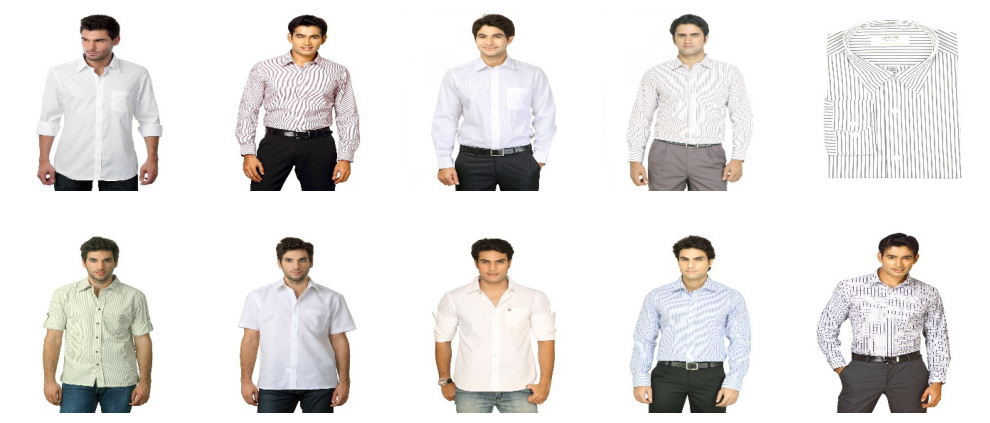

In [6]:
output_text_search = text_obj.run("Men's white shirts")

from matplotlib import pyplot as plt

# Create a plot to display 10 images in a 2x5 grid
plt.figure(figsize=(10, 5))
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.imshow(output_text_search[i-1])
    plt.axis("off")

plt.tight_layout()
plt.show()

###### Image based search

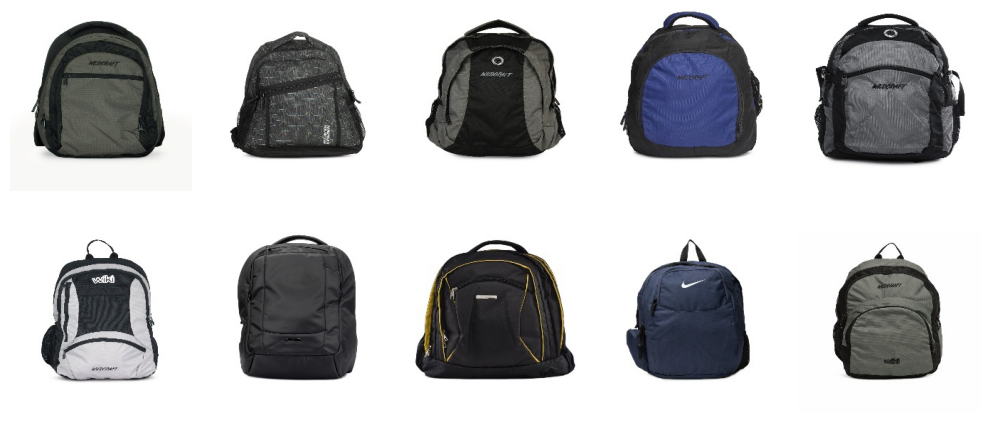

In [9]:
import cv2

img = cv2.imread('C:/Users/DELL/CASE STUDY/Flask_Working_Visual/test images/backpack.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

output_visual_search = visual_obj.run(img)

from matplotlib import pyplot as plt

# Create a plot to display 10 images in a 2x5 grid
plt.figure(figsize=(10, 5))
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.imshow(output_visual_search[i-1])
    plt.axis("off")

plt.tight_layout()
plt.show()

###### Testing with outliers i.e. data not present in our database

In [10]:
output_text_search = text_obj.run("Chair")
print(output_text_search,'\n\n')

img = cv2.imread('C:/Users/DELL/CASE STUDY/Flask_Working_Visual/test images/chair.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

output_visual_search = visual_obj.run(img)
print(output_visual_search,'\n\n')

Sorry, we could not find what you are looking for! 


Sorry, we could not find what you are looking for! 


